# Ploter file for PSim simulations

### Package loading and general house keeping

In [1]:
using CSV
using DataFrames
using FFTW
using Plots
using LaTeXStrings

theme(:bright)
plot_font = "Computer Modern"
default(fontfamily=plot_font,linewidth=2, framestyle=:box, label=nothing, grid=false)
scalefontsizes(1.3)

### Add file name and load file to data frame

In [2]:
FilePath = "NewMotorNominalRun.csv";
Data = DataFrame(CSV.File(FilePath,header = 1, delim = ","));

### Get dataframe column name

In [ ]:
names(Data)

### Select plot data and storage type

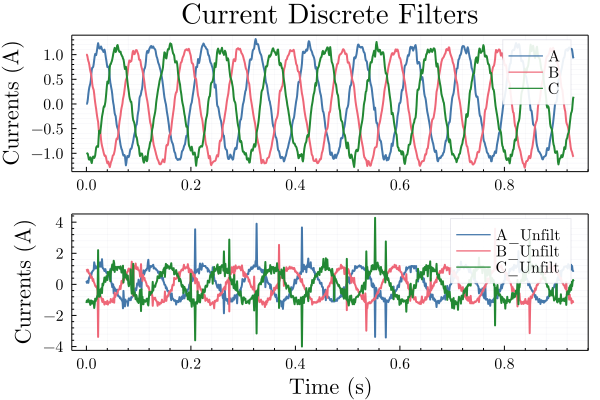

In [40]:
Time = Data."Time (microseconds)" * 1e-6;

p1 = plot(Time,Data.Ia,label = "A")
p1 = plot!(Time,Data.Ib,label = "B")
p1 = plot!(Time,Data.Ic,label = "C")
p1 = plot!(ylabel = "Currents (A)")
p1 = plot!(title = "Current Discrete Filters")

p2 = plot(Time,Data.UN_FILT_VALS,label = "A_Unfilt")
p2 = plot!(Time,Data.Ib_Unfilt,label = "B_Unfilt")
p2 = plot!(Time,Data.Ic_Unfilt,label = "C_Unfilt")
p2 = plot!(xlabel = "Time (s)")
p2 = plot!(ylabel = "Currents (A)")

plot(p1,p2,layout = (2,1))
plot!(fmt = :pdf)

### Frequency domain step

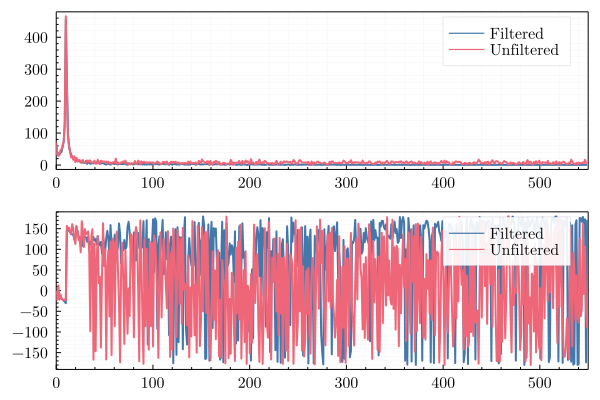

In [41]:
FreqSamp = 1100;

Freq = fftshift(fftfreq(length(Time), FreqSamp));
FFT_IA = fftshift(fft(Data.Ia));
FFT_IA_UNFILT = fftshift(fft(Data.UN_FILT_VALS));

p2 = plot(Freq , abs.(FFT_IA),label = "Filtered");
p2 = plot!(Freq , abs.(FFT_IA_UNFILT),label = "Unfiltered");
p2 = plot!(xlims = (0,FreqSamp/2));
p3 = plot(Freq,angle.(FFT_IA)*180/pi,label = "Filtered");
p3 = plot!(Freq,angle.(FFT_IA_UNFILT)*180/pi,label = "Unfiltered");
p3 = plot!(xlims = (0,FreqSamp/2));

plot(p2,p3,layout = (2,1))
plot!(fmt = :pdf)

### Error analysis (histogram)

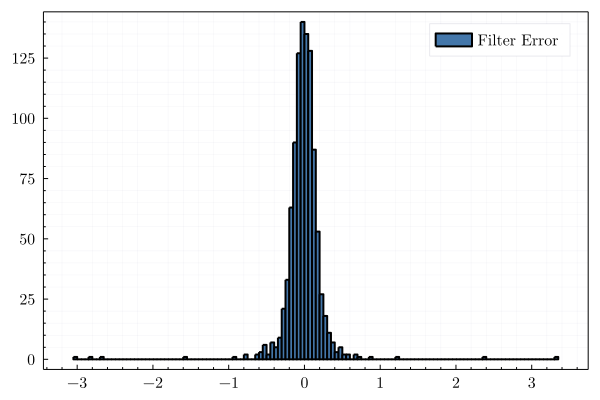

In [42]:
Error = Data.Ia - Data.UN_FILT_VALS;

histogram(Error,label = "Filter Error")

